# Imports


In [50]:
# for dataframes
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
from scipy import stats

# for web scraping
import requests
from bs4 import BeautifulSoup
import json
from pathlib import Path

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import pydot

# for data balance
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'pydot'

In [ ]:
# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# scoring
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# for hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Initial Data Prep

**Read in initial data**

In [ ]:
# data = pd.read_csv("wildfire_data.csv", low_memory = False)
# data

In [ ]:
# data.columns

Create small subset to send.

In [ ]:
# to_send = data.iloc[:500, :].reset_index()

# # save to csv file
# path = "/Users/lmhartmann/Desktop/Weather/to_send.csv"
# data.to_csv(path)

Keep selected columns.

In [ ]:
# to_keep = ["LONGITUDE", "LATITUDE", "OBJECTID",
#            "OWNER_DESCR",
#            "FIRE_YEAR", "DISCOVERY_DATE",
#            "DISCOVERY_DOY", "DISCOVERY_TIME",
#            "NWCG_CAUSE_CLASSIFICATION", "CONT_DATE",
#            "CONT_DOY", "CONT_TIME",
#            "STATE", "COUNTY", "FIPS_CODE", "FIPS_NAME", "FIRE_SIZE",
#            "FIRE_SIZE_CLASS"]

In [ ]:
# raw_data = data.copy()
# data = data[to_keep].copy()
# data

Select only Natural fires and USFS fires.

In [ ]:
# data = data.loc[(data["NWCG_CAUSE_CLASSIFICATION"] == "Natural")]
# data = data.loc[data["OWNER_DESCR"] == "USFS"]

Check datatypes and unique values.

In [ ]:
# data.dtypes

In [ ]:
# print(data["NWCG_CAUSE_CLASSIFICATION"].unique())
# print(len(data["STATE"].unique()))
# print(data["OWNER_DESCR"].unique())

Reset index.

In [ ]:
# data = data.reset_index()
# data

Select further sumsbet of columns.

In [ ]:
# # drop 'index', 'owner_descr', 'nwcg_cause_classification'
# data = data.drop(["index", "OWNER_DESCR", "NWCG_CAUSE_CLASSIFICATION"], axis = 1)
# data

Initial null check.

In [ ]:
# data.isnull().sum()

In [ ]:
# print("Percent Null: Discovery Time: ", 34/len(data)*100)
# print("Percent Null: Cont Date: ", 3987/len(data)*100)
# print("Percent Null: Cont Doy: ", 3987/len(data)*100)
# print("Percent Null: Cont Time: ", 4412/len(data)*100)
# print("Percent Null: County: ", 58658/len(data)*100)
# print("Percent Null: Fips Code: ", 58658/len(data)*100)
# print("Percent Null: Fips Name: ", 58658/len(data)*100)

Select portion of data and collect weather data and save.

In [ ]:
# df1 = data.iloc[:5000, :]
# df2 = data.iloc[5001:10000, :].reset_index().drop(["index"], axis = 1)

In [ ]:
# # get weather data

# # initalize new dataframe
# weather_df = pd.DataFrame(columns = ["DISCOVERY_DATE", "TIME", "TEMPERATURE",
#                                      "RELATIVE_HUMIDITY", "PRECIPITATION", "SURFACE_PRESSURE",
#                                      "CLOUD_COVER", "WIND_SPEED_10M", "WIND_SPEED_100M",
#                                      "WIND_GUSTS_10M"])

# # base website
# url = "https://archive-api.open-meteo.com/v1/archive?"

# # for loop through dataframe
# for row in range(len(df1)):

#     discov = datetime.strptime(str.rstrip(df1["DISCOVERY_DATE"][row][0:19]), "%Y/%m/%d %H:%M:%S")
#     prior = discov - timedelta(weeks = 2)
#     # convert into strings
#     discov_str = "&end_date=" + discov.strftime("%Y-%m-%d")
#     prior_str = "&start_date=" + prior.strftime("%Y-%m-%d")

#     long = "&longitude=" + str(df1["LONGITUDE"][row])
#     lat = "latitude=" + str(df1["LATITUDE"][row])

#     over_req = "&hourly=temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_gusts_10m"

#     final_url = url + lat + long + prior_str + discov_str + over_req

#     response = requests.get(final_url)
#     soup = BeautifulSoup(response.content, "html.parser")

#     site_json = json.loads(soup.text)

#     # go through every day in the two weeks and pull following information
#     time = site_json["hourly"]["time"]
#     temperature = site_json["hourly"]["temperature_2m"]
#     rel_hum = site_json["hourly"]["relative_humidity_2m"]
#     precip = site_json["hourly"]["precipitation"]
#     sur_pres = site_json["hourly"]["surface_pressure"]
#     cloud_cover = site_json["hourly"]["cloud_cover"]
#     wind_speed_10m = site_json["hourly"]["wind_speed_10m"]
#     wind_speed_100m = site_json["hourly"]["wind_speed_100m"]
#     wind_gusts_10m = site_json["hourly"]["wind_gusts_10m"]

#     for i in range(len(site_json["hourly"]["time"])):
#         row_to_add = [df1["DISCOVERY_DATE"][row], time[i], temperature[i],
#                       rel_hum[i], precip[i], sur_pres[i], cloud_cover[i],
#                       wind_speed_10m[i], wind_speed_100m[i], wind_gusts_10m[i]]

#         weather_df.loc[len(weather_df)] = row_to_add

#     if (row % 50 == 0):
#         print("Row: ", row)

#     # save to csv file
#     path = "/Users/lmhartmann/Desktop/Weather/df1.csv"
#     weather_df.to_csv(path)

# Load in Weather Data and Created Merged Data

In [ ]:
# path = "/Users/lmhartmann/Desktop/Weather/df1.csv"
# weather = pd.read_csv(path, low_memory = False)
# weather

Add the 'fire_number' (id_value) to weather dataframe.

In [ ]:
# # each fire now has 360 rows
# # create new column and name 0 through 4999 identifying for each fire

# weather["fire_number"] = np.nan

# i = 0
# for row in range(len(weather)):

#     weather["fire_number"][row] = i

#     if ((row + 1) % 360) == 0:
#         i += 1

# weather

In [ ]:
# # make weather to int
# weather["fire_number"] = weather["fire_number"].astype(int)

# # create "fire_number" equal to index
# df1['fire_number'] = df1.index
# df1

Merge weather info with fire info.

In [ ]:
# # merge df1 and weather on "fire_number"
# data = weather.merge(df1, on='fire_number')

# data

### Save to create dataset we will work with

Check for nulls.

In [ ]:
# data.isnull().sum()

In [ ]:
# print("Percent Null: Cont Date: ", 1800/len(data)*100)
# print("Percent Null: Cont Doy: ", 1800/len(data)*100)
# print("Percent Null: Cont Time: ", 2160/len(data)*100)
# print("Percent Null: County: ", 156240/len(data)*100)
# print("Percent Null: Fips Code: ", 156240/len(data)*100)
# print("Percent Null: Fips Name: ", 156240/len(data)*100)

Further narrow columns.

In [ ]:
# # decide to keep
# to_keep = ["LONGITUDE", "LATITUDE",
#            "DISCOVERY_DATE_x", "TIME", "TEMPERATURE",
#            "RELATIVE_HUMIDITY", "PRECIPITATION", "SURFACE_PRESSURE",
#            "CLOUD_COVER", "WIND_SPEED_10M", "WIND_SPEED_100M",
#            "WIND_GUSTS_10M", "STATE",
#            "FIRE_SIZE", "FIRE_SIZE_CLASS"]

# data = data[to_keep].copy()
# data

Export.

In [ ]:
# # export
# path = "/Users/lmhartmann/Desktop/Capstone/data_merged.csv"
# data.to_csv(path)

# Add More Columns

## Altitude

In [ ]:
# # get altitude data (m)

# api_key = my_key

# # base website
# url = "https://maps.googleapis.com/maps/api/elevation/json?locations="

# for row in range(len(data)):
#     lat = str(df1["LATITUDE"][row])
#     lng = str(df1["LONGITUDE"][row])

#     final_url = url + lat + "%2C" + lng + "&key=" + api_key

#     response = requests.get(final_url)
#     soup = BeautifulSoup(response.content, "html.parser")

#     site_json = json.loads(soup.text)

#     elevation = site_json["results"][0]["elevation"]

#     altitude_df.loc[len(altitude_df)] = [elevation]

#     if (row % 100 == 0):
#         print(row)

In [ ]:
# path = "/Users/lmhartmann/Desktop/Capstone/altitude.csv"
# altitude_df.to_csv(path)

In [ ]:
# load in

path = "/Users/lmhartmann/Desktop/Capstone/altitude.csv"
altitude = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)

# check
altitude

## Dew Point and Heat Index

In [ ]:
# # dew point
# def dew_point(temp, rh):

#     dp = temp - ((100 - rh)/5)

#     return dp

# # heat index
# def heat_index(temp, rh):

#     hi = 0.5*(temp + 61 + ((temp - 68)*1.2) + (rh*0.094))

#     if hi < 80:
#         hi = temp

#     return hi

# # wind chill
# def wind_chill(temp, ws):

#     # convert wind speed from kmh to mph
#     ws = ws/1.609

#     if (temp > 50) & (ws > 3):
#         wc = 35.74 + 0.6215*temp - 35.75*(ws**0.16) + 0.4275*(ws**0.16)

#     else:
#         wc = np.nan

#     return wc

In [ ]:
# data["DEW_POINT"] = np.nan
# data["HEAT_INDEX"] = np.nan
# data["WIND_CHILL_10M"] = np.nan
# data["WIND_CHILL_100M"] = np.nan

# for row in range(len(data)):
#     # calculate dew point
#     data.loc[row, "DEW_POINT"] = dew_point(data["TEMPERATURE"][row],
#                                            data["RELATIVE_HUMIDITY"][row])

#     # calculate heat index
#     data.loc[row, "HEAT_INDEX"]  = heat_index(data["TEMPERATURE"][row],
#                                               data["RELATIVE_HUMIDITY"][row])

#     # calaculate wind chill at 10m
#     data.loc[row, "WIND_CHILL_10M"]= wind_chill(data["TEMPERATURE"][row],
#                                                 data["WIND_SPEED_10M"][row])

#     # calculate wind chill at 100m 
#     data.loc[row, "WIND_CHILL_100M"]  = wind_chill(data["TEMPERATURE"][row],
#                                                    data["WIND_SPEED_100M"][row])

In [ ]:
# count nulls
data.isnull().sum()

In [ ]:
# # drop wind chill columns
# data.drop(["WIND_CHILL_10M", "WIND_CHILL_100M"], axis = 1, inplace = True)

In [ ]:
# write out
# path = "/Users/lmhartmann/Desktop/Capstone/data_more_weather.csv"
# data.to_csv(path)

In [ ]:
# load in

path = "/Users/lmhartmann/Desktop/Capstone/data_more_weather.csv"
data_more_weather = pd.read_csv(path)

## Merge Altitude with More Weather Data

In [ ]:
# each fire now has 360 rows
# create new column and name 0 through 4999 identifying for each fire

data_more_weather["fire_number"] = np.nan

i = 0
for row in range(len(data_more_weather)):

    data_more_weather.loc[row, "fire_number"] = i

    if ((row + 1) % 360) == 0:
        i += 1

data_more_weather

In [ ]:
# make fire_number to int
data_more_weather["fire_number"] = data_more_weather["fire_number"].astype(int)

# create "fire_number" equal to index
altitude['fire_number'] = altitude.index
altitude

In [ ]:
# merge altitude and data_more_weather on "fire_number"
data = data_more_weather.merge(altitude, on='fire_number')

data

In [ ]:
data.columns

In [ ]:
# keep only selected columns
data = data.drop(["Unnamed: 0"], axis = 1)

# write out
path = "/Users/lmhartmann/Desktop/Capstone/data_final.csv"
data.to_csv(path)

# Data Exploration

Load in data.

In [ ]:
# path = "/content/drive/MyDrive/Colab_Notebooks/data_merged.csv"
path = "/Users/lmhartmann/Desktop/Capstone/data_final.csv"
data = pd.read_csv(path).drop(["Unnamed: 0", "fire_number"], axis = 1)
data

Fire Size Histogram

In [ ]:
sns.histplot(data = data, x = "FIRE_SIZE_CLASS")

## Outliers

In [ ]:
data.isnull().sum()

In [ ]:
def outliers_IQR(col):
    q1 = col.quantile(0.25)

    q3 = col.quantile(0.75)

    IQR = q3 - q1

    outliers = col[((col < (q1 - 1.5 * IQR)) | (col > (q3 + 1.5 * IQR)))]

    return outliers

In [ ]:
def outliers_sd(col):
    three_sd = 3 * col.std()

    median = col.median()

    outliers = col[(col > (median + three_sd)) | (col < (median - three_sd))]

    return outliers

In [ ]:
no_outliers = ["LONGITUDE", "LATITUDE", "DISCOVERY_DATE_x", "TIME",
               "STATE", "FIRE_SIZE", "FIRE_SIZE_CLASS"]

for col in data.columns:
  if col in no_outliers:
    pass
  else:
    outs_IQR = outliers_IQR(data[col])
    print("\nPercent " + col + " Outliers by IQR: ",
          len(outs_IQR)/len(data)*100)

    outs_sd = outliers_sd(data[col])
    print("Percent " + col + " Outliers by Standard Deviation: ",
          len(outs_sd)/len(data)*100)

In [ ]:
# create a version with all outliers removed
# use standard deviation because it is a better representation of the data
# will use z-score

no_outliers = ["LONGITUDE", "LATITUDE", "DISCOVERY_DATE_x", "TIME",
               "STATE", "FIRE_SIZE", "FIRE_SIZE_CLASS", "SEASON_winter",
               "SEASON_fall", "SEASON_spring", "SEASON_summer"]
data_no_outliers = data.copy()

counter = 0

for col in data.columns:
  if col in no_outliers:
    pass
  else:
    outs_sd = outliers_sd(data[col])

    print(col)

    for ind in outs_sd.index:

      if (counter % 1000 == 0):
        print(counter)
      
      counter += 1

      if ind in data_no_outliers.index:
        data_no_outliers.drop(ind, inplace = True)


# print out
print("Size Before Outlier Removal: ", len(data))
print("Size After Outlier Removal: ", len(data_no_outliers))


In [ ]:
# save no_outliers
path = "/Users/lmhartmann/Desktop/Capstone/data_final_no_outliers.csv"
data_no_outliers.to_csv(path)

In [ ]:
# read in no_outliers
# path = "/content/drive/MyDrive/Colab_Notebooks/data_no_outliers.csv"
path = "/Users/lmhartmann/Desktop/Capstone/data_final_no_outliers.csv"
data_no_outliers = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)
data_no_outliers

In [ ]:
# double check no outliers
no_outliers = ["LONGITUDE", "LATITUDE", "DISCOVERY_DATE_x", "TIME",
               "STATE", "FIRE_SIZE", "FIRE_SIZE_CLASS", "SEASON_winter",
               "SEASON_spring", "SEASON_summer", "SEASON_fall"]

for col in data_no_outliers.columns:
  if col in no_outliers:
    pass
  else:
    outs_IQR = outliers_IQR(data_no_outliers[col])
    print("\nPercent " + col + " Outliers by IQR: ",
          len(outs_IQR)/len(data_no_outliers)*100)

    outs_sd = outliers_sd(data_no_outliers[col])
    print("Percent " + col + " Outliers by Standard Deviation: ",
          len(outs_sd)/len(data_no_outliers)*100)

## Visualizations

### Histograms

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 14))

sns.histplot(data = data, x = "TEMPERATURE", ax = axes[0, 0])
sns.histplot(data = data, x = "RELATIVE_HUMIDITY", ax = axes[1, 0])
sns.histplot(data = data, x = "PRECIPITATION", ax = axes[0, 1])
sns.histplot(data = data, x = "SURFACE_PRESSURE", ax = axes[1, 1])
sns.histplot(data = data, x = "CLOUD_COVER", ax = axes[2, 0])
sns.histplot(data = data, x = "WIND_SPEED_10M", ax = axes[2, 1])
sns.histplot(data = data, x = "WIND_SPEED_100M", ax = axes[3, 0])
sns.histplot(data = data, x = "WIND_GUSTS_10M", ax = axes[3, 1])

#### Seperate DataFrames
Create several dataframes by fire size class to visualize each class seperately.

In [ ]:
size_A = data.loc[data["FIRE_SIZE_CLASS"] == "A"].reset_index().drop(["index"], axis = 1)
size_B = data.loc[data["FIRE_SIZE_CLASS"] == "B"].reset_index().drop(["index"], axis = 1)
size_C = data.loc[data["FIRE_SIZE_CLASS"] == "C"].reset_index().drop(["index"], axis = 1)
size_D = data.loc[data["FIRE_SIZE_CLASS"] == "D"].reset_index().drop(["index"], axis = 1)
size_E = data.loc[data["FIRE_SIZE_CLASS"] == "E"].reset_index().drop(["index"], axis = 1)
size_F = data.loc[data["FIRE_SIZE_CLASS"] == "F"].reset_index().drop(["index"], axis = 1)
size_G = data.loc[data["FIRE_SIZE_CLASS"] == "G"].reset_index().drop(["index"], axis = 1)

fire_classes = ["A", "B", "C", "D", "E", "F", "G"]

#### Temperature by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))

sns.histplot(data = size_A, x = "TEMPERATURE", ax = axes[0, 0])
sns.histplot(data = size_B, x = "TEMPERATURE", ax = axes[0,1])
sns.histplot(data = size_C, x = "TEMPERATURE", ax = axes[1,0])
sns.histplot(data = size_D, x = "TEMPERATURE", ax = axes[1,1])
sns.histplot(data = size_E, x = "TEMPERATURE", ax = axes[2,0])
sns.histplot(data = size_F, x = "TEMPERATURE", ax = axes[2,1])
sns.histplot(data = size_G, x = "TEMPERATURE", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Temperature by Fire Size Class")

#### Relative Humidity by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "RELATIVE_HUMIDITY", ax = axes[0, 0])
sns.histplot(data = size_B, x = "RELATIVE_HUMIDITY", ax = axes[0,1])
sns.histplot(data = size_C, x = "RELATIVE_HUMIDITY", ax = axes[1,0])
sns.histplot(data = size_D, x = "RELATIVE_HUMIDITY", ax = axes[1,1])
sns.histplot(data = size_E, x = "RELATIVE_HUMIDITY", ax = axes[2,0])
sns.histplot(data = size_F, x = "RELATIVE_HUMIDITY", ax = axes[2,1])
sns.histplot(data = size_G, x = "RELATIVE_HUMIDITY", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Relative Humidity by Fire Size Class")

#### Precipitation by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "PRECIPITATION", ax = axes[0, 0])
sns.histplot(data = size_B, x = "PRECIPITATION", ax = axes[0,1])
sns.histplot(data = size_C, x = "PRECIPITATION", ax = axes[1,0])
sns.histplot(data = size_D, x = "PRECIPITATION", ax = axes[1,1])
sns.histplot(data = size_E, x = "PRECIPITATION", ax = axes[2,0])
sns.histplot(data = size_F, x = "PRECIPITATION", ax = axes[2,1])
sns.histplot(data = size_G, x = "PRECIPITATION", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Precipitation by Fire Size Class")

#### Surface Pressure by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "SURFACE_PRESSURE", ax = axes[0, 0])
sns.histplot(data = size_B, x = "SURFACE_PRESSURE", ax = axes[0,1])
sns.histplot(data = size_C, x = "SURFACE_PRESSURE", ax = axes[1,0])
sns.histplot(data = size_D, x = "SURFACE_PRESSURE", ax = axes[1,1])
sns.histplot(data = size_E, x = "SURFACE_PRESSURE", ax = axes[2,0])
sns.histplot(data = size_F, x = "SURFACE_PRESSURE", ax = axes[2,1])
sns.histplot(data = size_G, x = "SURFACE_PRESSURE", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Surface Pressure by Fire Size Class")

#### Cloud Cover by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "CLOUD_COVER", ax = axes[0, 0])
sns.histplot(data = size_B, x = "CLOUD_COVER", ax = axes[0,1])
sns.histplot(data = size_C, x = "CLOUD_COVER", ax = axes[1,0])
sns.histplot(data = size_D, x = "CLOUD_COVER", ax = axes[1,1])
sns.histplot(data = size_E, x = "CLOUD_COVER", ax = axes[2,0])
sns.histplot(data = size_F, x = "CLOUD_COVER", ax = axes[2,1])
sns.histplot(data = size_G, x = "CLOUD_COVER", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Cloud Cover by Fire Size Class")

#### Wind Speed 10m Above by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_SPEED_10M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_SPEED_10M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_SPEED_10M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_SPEED_10M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_SPEED_10M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_SPEED_10M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_SPEED_10M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Speed 10m Above by Fire Size Class")

#### Wind Speed 100m Above by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_SPEED_100M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_SPEED_100M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_SPEED_100M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_SPEED_100M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_SPEED_100M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_SPEED_100M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_SPEED_100M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Speed 100m Above by Fire Size Class")

#### Wind Gusts 10m Above by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_GUSTS_10M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_GUSTS_10M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_GUSTS_10M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_GUSTS_10M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_GUSTS_10M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_GUSTS_10M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_GUSTS_10M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Gusts 10m Above by Fire Size Class")

### Geo Graphing

Load in Geo Data.

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

# wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

path = "/Users/lmhartmann/Desktop/Capstone/cb_2018_us_state_500k"
gdf = gpd.read_file(path)
gdf = gdf.merge(data,left_on='STUSPS',right_on='STATE')
gdf.head()

#### Temperature by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "TEMPERATURE",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Temperature by State")
ax.set_axis_off()

#### Relative Humidity by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "RELATIVE_HUMIDITY",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Relative Humidity by State")
ax.set_axis_off()

#### Precipitation by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "PRECIPITATION",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Precipitation by State")
ax.set_axis_off()

#### Surface Pressure by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "SURFACE_PRESSURE",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Surface Pressure by State")
ax.set_axis_off()

#### Cloud Cover by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "CLOUD_COVER",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Cloud Cover by State")
ax.set_axis_off()

#### Wind Speed 10m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_SPEED_10M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Speed 10m Above by State")
ax.set_axis_off()

#### Wind Speed 100m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_SPEED_100M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Speed 100m Above by State")
ax.set_axis_off()

#### Wind Gusts 10m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_GUSTS_10M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Gusts 10m Above by State")
ax.set_axis_off()

In [ ]:
data.corr(numeric_only = True)

# Modeling

In [3]:
# Final Load In
path = "/Users/lmhartmann/Desktop/Capstone/data_final.csv"
data = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)

path = "/Users/lmhartmann/Desktop/Capstone/data_final_no_outliers.csv"
data_no_outliers = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)

## Preprocessing

Look at data balance.

In [4]:
print("With Outliers (percent): ")
data_counts = data["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100
data_counts

With Outliers (percent): 


FIRE_SIZE_CLASS
A    67.86
B    24.00
C     4.46
D     1.20
F     0.98
E     0.96
G     0.54
Name: proportion, dtype: float64

In [5]:
print("Without Outliers (percent): ")
data_no_outliers["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100

Without Outliers (percent): 


FIRE_SIZE_CLASS
A    68.922810
B    23.341490
C     4.189924
D     1.103331
F     0.959411
E     0.936198
G     0.546837
Name: proportion, dtype: float64

In both, as the fire size increases, i.e. the letter label increases, the number of fires decrease.

### Balance Data

In [6]:
to_keep = ["TEMPERATURE", "RELATIVE_HUMIDITY",
           "PRECIPITATION", "SURFACE_PRESSURE",
           "CLOUD_COVER", "WIND_SPEED_10M",
           "WIND_SPEED_100M", "WIND_GUSTS_10M",
           "SEASON_spring", "SEASON_summer",
           "SEASON_fall", "SEASON_winter",
           "ALTITUDE", "DEW_POINT",
           "HEAT_INDEX"]
target = ["FIRE_SIZE_CLASS"]

oversample = SMOTE()

X = data[to_keep].copy()
y = data[target].copy()

data_no_outliers_X = data_no_outliers[to_keep].copy()
data_no_outliers_y = data_no_outliers[target].copy()

# balance data
bal_X, bal_y = oversample.fit_resample(X, y)
bal_no_outliers_X, bal_no_outliers_y = oversample.fit_resample(data_no_outliers_X,
                                                               data_no_outliers_y)

# with outliers
# add y column, then rename
bal_X["FIRE_SIZE_CLASS"] = bal_y
data_balanced = bal_X.copy()

# without outliers
# add y column, then rename
bal_no_outliers_X["FIRE_SIZE_CLASS"] = bal_no_outliers_y
data_no_outliers_balanced = bal_no_outliers_X.copy()

Null Check

In [7]:
data.isnull().sum()

LONGITUDE            0
LATITUDE             0
DISCOVERY_DATE_x     0
TIME                 0
TEMPERATURE          0
RELATIVE_HUMIDITY    0
PRECIPITATION        0
SURFACE_PRESSURE     0
CLOUD_COVER          0
WIND_SPEED_10M       0
WIND_SPEED_100M      0
WIND_GUSTS_10M       0
STATE                0
FIRE_SIZE            0
FIRE_SIZE_CLASS      0
SEASON_winter        0
SEASON_fall          0
SEASON_spring        0
SEASON_summer        0
DEW_POINT            0
HEAT_INDEX           0
fire_number          0
ALTITUDE             0
dtype: int64

In [8]:
data_no_outliers.isnull().sum()

LONGITUDE            0
LATITUDE             0
DISCOVERY_DATE_x     0
TIME                 0
TEMPERATURE          0
RELATIVE_HUMIDITY    0
PRECIPITATION        0
SURFACE_PRESSURE     0
CLOUD_COVER          0
WIND_SPEED_10M       0
WIND_SPEED_100M      0
WIND_GUSTS_10M       0
STATE                0
FIRE_SIZE            0
FIRE_SIZE_CLASS      0
SEASON_winter        0
SEASON_fall          0
SEASON_spring        0
SEASON_summer        0
DEW_POINT            0
HEAT_INDEX           0
ALTITUDE             0
dtype: int64

In [9]:
data_balanced.isnull().sum()

TEMPERATURE          0
RELATIVE_HUMIDITY    0
PRECIPITATION        0
SURFACE_PRESSURE     0
CLOUD_COVER          0
WIND_SPEED_10M       0
WIND_SPEED_100M      0
WIND_GUSTS_10M       0
SEASON_spring        0
SEASON_summer        0
SEASON_fall          0
SEASON_winter        0
ALTITUDE             0
DEW_POINT            0
HEAT_INDEX           0
FIRE_SIZE_CLASS      0
dtype: int64

In [10]:
data_no_outliers_balanced.isnull().sum()

TEMPERATURE          0
RELATIVE_HUMIDITY    0
PRECIPITATION        0
SURFACE_PRESSURE     0
CLOUD_COVER          0
WIND_SPEED_10M       0
WIND_SPEED_100M      0
WIND_GUSTS_10M       0
SEASON_spring        0
SEASON_summer        0
SEASON_fall          0
SEASON_winter        0
ALTITUDE             0
DEW_POINT            0
HEAT_INDEX           0
FIRE_SIZE_CLASS      0
dtype: int64

In [11]:
print("With Outliers (percent): ")
data_balanced["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100

With Outliers (percent): 


FIRE_SIZE_CLASS
A    14.285714
B    14.285714
C    14.285714
D    14.285714
G    14.285714
F    14.285714
E    14.285714
Name: proportion, dtype: float64

In [12]:
print("Without Outliers (percent): ")
data_no_outliers_balanced["FIRE_SIZE_CLASS"].value_counts(normalize = True)*100

Without Outliers (percent): 


FIRE_SIZE_CLASS
A    14.285714
B    14.285714
C    14.285714
D    14.285714
G    14.285714
F    14.285714
E    14.285714
Name: proportion, dtype: float64

### Model Preprocessing

Create smaller sample to work with.

In [ ]:
# to_work = data.sample(n = 500000, random_state = 13)
# to_work_no_outliers = data_no_outliers.sample(n = 500000, random_state = 13)

# to_work_balanced = data_balanced.sample(n = 500000, random_state = 13)
# to_work_no_outliers_balanced = data_no_outliers_balanced.sample(n = 500000, random_state = 13)

**Names for Each Seperate Dataframe**


*   df1 = no modifications
*   df2 = without outliers
*   df3 = with outliers, balanced data
*   df4 = without outliers, balanced data



In [13]:
df1 = data
df2 = data_no_outliers
df3 = data_balanced
df4 = data_no_outliers_balanced

#### Data Description by Class

In [14]:
to_look = ["TEMPERATURE", "RELATIVE_HUMIDITY",
           "PRECIPITATION", "SURFACE_PRESSURE",
           "CLOUD_COVER", "WIND_SPEED_10M",
           "WIND_SPEED_100M", "WIND_GUSTS_10M",
           "ALTITUDE", "DEW_POINT",
           "HEAT_INDEX", "FIRE_SIZE_CLASS"]

In [15]:
# df1
# no modifications

df1_look = df1[to_look].copy()

df1_look.groupby(by = "FIRE_SIZE_CLASS").agg(["mean", "std"])

TEMPERATURE           RELATIVE_HUMIDITY             \
                       mean       std              mean        std   
FIRE_SIZE_CLASS                                                      
A                 18.624617  7.218387         41.380568  23.668537   
B                 19.245566  7.494925         40.267750  23.600799   
C                 20.904367  7.813083         39.379285  23.982318   
D                 19.953352  8.001623         40.223194  23.568011   
E                 21.117245  7.764368         34.446933  21.490743   
F                 20.757285  7.266714         37.710544  21.852336   
G                 19.881440  7.858459         37.114506  23.735249   

                PRECIPITATION           SURFACE_PRESSURE             \
                         mean       std             mean        std   
FIRE_SIZE_CLASS                                                       
A                    0.045881  0.313749       811.508214  50.671124   
B                    0.035686  0.266867       823.572925  62.773634   
C                    0.038619  0.317716       839.041637  74.119149   
D                    0.027153  0.221747       843.375898  69.458769   
E                    0.021429  0.207035       827.170613  61.238072   
F                    0.023832  0.236226       841.991831  51.724840   
G                    0.026883  0.217343       831.484578  62.054577   

                CLOUD_COVER             ... WIND_SPEED_100M            \
                       mean        std  ...            mean       std   
FIRE_SIZE_CLASS                         ...                             
A                 18.182218  25.211923  ...       11.860852  7.068299   
B                 17.310338  24.525560  ...       13.114226  7.905517   
C                 17.086460  23.764384  ...       13.062045  8.035946   
D                 15.843241  22.134866  ...       13.809894  8.892667   
E                 13.203704  19.778200  ...       13.022940  8.254123   
F                 14.031066  21.587841  ...       11.752086  7.775348   
G                 15.947737  23.473544  ...       12.620648  7.830991   

                WIND_GUSTS_10M                ALTITUDE             DEW_POINT  \
                          mean        std         mean         std      mean   
FIRE_SIZE_CLASS                                                                
A                    24.320949  11.808457  1945.471971  532.261185  6.900730   
B                    25.081375  12.263237  1940.801517  566.350403  7.299116   
C                    24.749849  11.965620  1848.726630  587.091219  8.780224   
D                    25.471134  12.678683  1868.982745  621.917759  7.997991   
E                    25.719931  12.739716  1932.573087  603.595293  8.006632   
F                    24.640255  12.543452  1856.559870  629.857799  8.299393   
G                    25.304033  12.545820  2016.666047  577.294482  7.304342   

                          HEAT_INDEX            
                      std       mean       std  
FIRE_SIZE_CLASS                                 
A                5.118783  18.624617  7.218387  
B                5.899990  19.245566  7.494925  
C                6.741246  20.904367  7.813083  
D                6.975266  19.953352  8.001623  
E                5.983255  21.117245  7.764368  
F                5.634535  20.757285  7.266714  
G                5.599555  19.881440  7.858459  

[7 rows x 22 columns]

In [16]:
# df2
# no outliers

df2_look = df2[to_look].copy()

df2_look.groupby(by = "FIRE_SIZE_CLASS").agg(["mean", "std"])

TEMPERATURE           RELATIVE_HUMIDITY             \
                       mean       std              mean        std   
FIRE_SIZE_CLASS                                                      
A                 18.835538  7.074773         40.036953  22.680033   
B                 19.307172  7.233853         38.248911  22.403187   
C                 20.912757  7.668590         36.111572  21.906062   
D                 19.694967  7.334077         36.916012  21.682844   
E                 20.790029  7.674893         32.827823  20.795410   
F                 20.907562  7.086910         37.335828  21.076184   
G                 20.145166  7.880246         35.548902  22.356106   

                PRECIPITATION           SURFACE_PRESSURE             \
                         mean       std             mean        std   
FIRE_SIZE_CLASS                                                       
A                    0.011542  0.073174       810.171218  47.538771   
B                    0.010269  0.068925       816.093907  52.746826   
C                    0.010469  0.070137       825.631556  60.664624   
D                    0.010346  0.070995       824.459454  50.043021   
E                    0.007663  0.061716       819.513323  52.737516   
F                    0.008691  0.062717       838.834260  46.050865   
G                    0.009690  0.069471       826.218587  55.677997   

                CLOUD_COVER             ... WIND_SPEED_100M            \
                       mean        std  ...            mean       std   
FIRE_SIZE_CLASS                         ...                             
A                 14.221516  19.304344  ...       11.374770  6.328087   
B                 13.585600  18.922179  ...       12.203843  6.706377   
C                 13.389011  18.467698  ...       11.925287  6.666378   
D                 12.708371  17.512836  ...       12.228770  7.088958   
E                 11.364388  16.822407  ...       11.907359  6.646548   
F                 11.652752  17.340693  ...       10.554991  6.315541   
G                 12.994227  18.727795  ...       11.546649  6.568879   

                WIND_GUSTS_10M                ALTITUDE             DEW_POINT  \
                          mean        std         mean         std      mean   
FIRE_SIZE_CLASS                                                                
A                    23.471844  10.765758  1959.899722  513.018266  6.842929   
B                    24.016769  10.891849  1970.086909  524.164327  6.956954   
C                    23.820163  10.798039  1886.002436  534.160707  8.135072   
D                    24.366147  11.240877  1974.987981  511.728106  7.078170   
E                    24.861875  11.769813  1951.159811  577.346178  7.355594   
F                    23.381167  11.255463  1918.337620  510.902152  8.374727   
G                    24.088816  11.284097  2000.726275  578.546079  7.254947   

                          HEAT_INDEX            
                      std       mean       std  
FIRE_SIZE_CLASS                                 
A                4.969857  18.835538  7.074773  
B                5.308177  19.307172  7.233853  
C                5.998356  20.912757  7.668590  
D                5.503939  19.694967  7.334077  
E                5.461375  20.790029  7.674893  
F                5.288218  20.907562  7.086910  
G                5.548905  20.145166  7.880246  

[7 rows x 22 columns]

In [17]:
# df3
# balanced

df3_look = df3[to_look].copy()

df3_look.groupby(by = "FIRE_SIZE_CLASS").agg(["mean", "std"])

TEMPERATURE           RELATIVE_HUMIDITY             \
                       mean       std              mean        std   
FIRE_SIZE_CLASS                                                      
A                 18.624617  7.218387         41.380568  23.668537   
B                 19.242686  7.466270         39.953238  23.551827   
C                 20.905312  7.792495         38.930059  23.931874   
D                 19.946407  7.972630         39.711749  23.484001   
E                 21.121319  7.730444         33.911580  21.392850   
F                 20.751243  7.229404         37.202425  21.769779   
G                 19.887745  7.819486         36.583892  23.679336   

                PRECIPITATION           SURFACE_PRESSURE             \
                         mean       std             mean        std   
FIRE_SIZE_CLASS                                                       
A                    0.045881  0.313749       811.508214  50.671124   
B                    0.034225  0.240234       823.543762  62.739961   
C                    0.035323  0.265484       839.090146  74.137319   
D                    0.024263  0.176747       843.304039  69.459996   
E                    0.018783  0.168423       827.139849  61.227478   
F                    0.021539  0.184907       841.955710  51.655562   
G                    0.024830  0.185134       831.425153  62.035826   

                CLOUD_COVER             ... WIND_SPEED_100M            \
                       mean        std  ...            mean       std   
FIRE_SIZE_CLASS                         ...                             
A                 18.182218  25.211923  ...       11.860852  7.068299   
B                 17.013557  24.418536  ...       13.110637  7.803713   
C                 16.602603  23.534520  ...       13.055406  7.880229   
D                 15.279987  21.820270  ...       13.824476  8.765179   
E                 12.658022  19.388392  ...       13.033076  8.115320   
F                 13.501059  21.285835  ...       11.722855  7.624314   
G                 15.448590  23.182013  ...       12.618054  7.704262   

                WIND_GUSTS_10M                ALTITUDE             DEW_POINT  \
                          mean        std         mean         std      mean   
FIRE_SIZE_CLASS                                                                
A                    24.320949  11.808457  1945.471971  532.261185  6.900730   
B                    25.047382  12.162716  1941.472516  565.864300  7.289219   
C                    24.689537  11.781037  1848.229353  587.541239  8.772176   
D                    25.430628  12.524488  1869.572657  622.035039  7.974537   
E                    25.660991  12.577086  1932.406745  604.215887  7.988693   
F                    24.550976  12.370306  1857.017522  630.032593  8.277390   
G                    25.230208  12.384493  2016.745093  577.339357  7.290477   

                          HEAT_INDEX            
                      std       mean       std  
FIRE_SIZE_CLASS                                 
A                5.118783  18.624617  7.218387  
B                5.866297  19.242686  7.466270  
C                6.712278  20.905312  7.792495  
D                6.932324  19.946407  7.972630  
E                5.932885  21.121319  7.730444  
F                5.574235  20.751243  7.229404  
G                5.539271  19.887745  7.819486  

[7 rows x 22 columns]

In [18]:
# df4
# no outliers, balanced

df4_look = df4[to_look].copy()

df4_look.groupby(by = "FIRE_SIZE_CLASS").agg(["mean", "std"])

TEMPERATURE           RELATIVE_HUMIDITY             \
                       mean       std              mean        std   
FIRE_SIZE_CLASS                                                      
A                 18.835538  7.074773         40.036953  22.680033   
B                 19.297547  7.208414         37.950299  22.347645   
C                 20.918085  7.628763         35.619557  21.789767   
D                 19.708473  7.297734         36.351884  21.573990   
E                 20.785452  7.635354         32.301592  20.659456   
F                 20.914706  7.044201         36.815287  20.989585   
G                 20.159181  7.837641         35.010997  22.274386   

                PRECIPITATION           SURFACE_PRESSURE             \
                         mean       std             mean        std   
FIRE_SIZE_CLASS                                                       
A                    0.011542  0.073174       810.171218  47.538771   
B                    0.009875  0.061372       816.062166  52.693853   
C                    0.009847  0.058653       825.650098  60.594884   
D                    0.009759  0.058627       824.513177  50.029081   
E                    0.006917  0.049222       819.432234  52.780165   
F                    0.008379  0.052449       838.839376  46.071113   
G                    0.008964  0.056575       826.274592  55.709009   

                CLOUD_COVER             ... WIND_SPEED_100M            \
                       mean        std  ...            mean       std   
FIRE_SIZE_CLASS                         ...                             
A                 14.221516  19.304344  ...       11.374770  6.328087   
B                 13.248616  18.708752  ...       12.179107  6.583463   
C                 12.872886  18.097687  ...       11.895530  6.488819   
D                 12.151067  17.101060  ...       12.238091  6.934266   
E                 10.839068  16.390411  ...       11.901667  6.486418   
F                 11.153539  16.939373  ...       10.540907  6.151692   
G                 12.484558  18.321133  ...       11.535978  6.425339   

                WIND_GUSTS_10M                ALTITUDE             DEW_POINT  \
                          mean        std         mean         std      mean   
FIRE_SIZE_CLASS                                                                
A                    23.471844  10.765758  1959.899722  513.018266  6.842929   
B                    23.969836  10.783967  1970.119248  524.325577  6.944784   
C                    23.740936  10.621784  1885.965852  534.455107  8.123152   
D                    24.330041  11.079747  1974.175131  511.643179  7.064484   
E                    24.804202  11.616254  1952.165253  576.653079  7.330850   
F                    23.319080  11.091388  1918.905839  510.434549  8.363595   
G                    24.013814  11.111678  2000.015979  578.488741  7.247128   

                          HEAT_INDEX            
                      std       mean       std  
FIRE_SIZE_CLASS                                 
A                4.969857  18.835538  7.074773  
B                5.265810  19.297547  7.208414  
C                5.951329  20.918085  7.628763  
D                5.447711  19.708473  7.297734  
E                5.402464  20.785452  7.635354  
F                5.216528  20.914706  7.044201  
G                5.485330  20.159181  7.837641  

[7 rows x 22 columns]

#### Split data and standardize

In [19]:
to_keep = ["TEMPERATURE", "RELATIVE_HUMIDITY",
           "PRECIPITATION", "SURFACE_PRESSURE",
           "CLOUD_COVER", "WIND_SPEED_10M",
           "WIND_SPEED_100M", "WIND_GUSTS_10M",
           "SEASON_spring", "SEASON_summer",
           "SEASON_fall", "SEASON_winter",
           "ALTITUDE", "DEW_POINT",
           "HEAT_INDEX"]
target = ["FIRE_SIZE_CLASS"]

# perform split into x and y
df1_x = df1[to_keep].copy()
df1_y = df1[target].copy()

df2_x = df2[to_keep].copy()
df2_y = df2[target].copy()

df3_x = df3[to_keep].copy()
df3_y = df3[target].copy()

df4_x = df4[to_keep].copy()
df4_y = df4[target].copy()

In [20]:
# create list to contain all dataframes
Xs = [df1_x, df2_x, df3_x, df4_x]
ys = [df1_y, df2_y, df3_y, df4_y]

# for storing total train data
X_train_list1 = []
y_train_list1 = []

# for storing final train, validation, and test data
X_train_list = []
y_train_list = []
X_val_list = []
y_val_list = []
X_test_list = []
y_test_list = []


In [21]:
# seperate all data into train and test
for i in range(len(Xs)):
  X_train, X_test, y_train, y_test = train_test_split(Xs[i], ys[i],
                                                      test_size = 0.2,
                                                      stratify = ys[i],
                                                      random_state = 13)

  X_train_list1.append(X_train)
  y_train_list1.append(y_train)
  X_test_list.append(X_test)
  y_test_list.append(y_test)


# seperate train data into train and validation
for i in range(len(X_train_list1)):
  X_train, X_val, y_train, y_val = train_test_split(X_train_list1[i],
                                                    y_train_list1[i],
                                                    test_size = 0.3,
                                                    stratify = y_train_list1[i],
                                                    random_state = 13)

  X_train_list.append(X_train)
  y_train_list.append(y_train)
  X_val_list.append(X_val)
  y_val_list.append(y_val)



In [22]:
# no modifications
X_train_df1 = X_train_list[0]
X_test_df1 = X_test_list[0]

X_val_df1 = X_val_list[0]
y_val_df1 = y_val_list[0]

y_train_df1 = y_train_list[0]
y_test_df1 = y_test_list[0]


# without outliers
X_train_df2 = X_train_list[1]
X_test_df2 = X_test_list[1]

X_val_df2 = X_val_list[1]
y_val_df2 = y_val_list[1]

y_train_df2 = y_train_list[1]
y_test_df2 = y_test_list[1]

# with outliers, balanced
X_train_df3 = X_train_list[2]
X_test_df3 = X_test_list[2]

X_val_df3 = X_val_list[2]
y_val_df3 = y_val_list[2]

y_train_df3 = y_train_list[2]
y_test_df3 = y_test_list[2]

# without outliers, balanced
X_train_df4 = X_train_list[3]
X_test_df4 = X_test_list[3]

X_val_df4 = X_val_list[3]
y_val_df4 = y_val_list[3]

y_train_df4 = y_train_list[3]
y_test_df4 = y_test_list[3]

In [23]:
# check shapes
print("Shapes with Outliers: ")
print(X_train_df1.shape, y_train_df1.shape,
      X_val_df1.shape, y_val_df1.shape,
      X_test_df1.shape, y_test_df1.shape)

print("Shapes without Outliers: ")
print(X_train_df2.shape, y_train_df2.shape,
      X_val_df2.shape, y_val_df2.shape,
      X_test_df2.shape, y_test_df2.shape)

print("Shapes with Outliers Balanced: ")
print(X_train_df3.shape, y_train_df3.shape,
      X_val_df3.shape, y_val_df3.shape,
      X_test_df3.shape, y_test_df3.shape)

print("Shapes without Outliers Balanced: ")
print(X_train_df4.shape, y_train_df4.shape,
      X_val_df4.shape, y_val_df4.shape,
      X_test_df4.shape, y_test_df4.shape)

Shapes with Outliers: 
(1008000, 15) (1008000, 1) (432000, 15) (432000, 1) (360000, 15) (360000, 1)
Shapes without Outliers: 
(904663, 15) (904663, 1) (387713, 15) (387713, 1) (323095, 15) (323095, 1)
Shapes with Outliers Balanced: 
(4788201, 15) (4788201, 1) (2052087, 15) (2052087, 1) (1710072, 15) (1710072, 1)
Shapes without Outliers Balanced: 
(4364637, 15) (4364637, 1) (1870559, 15) (1870559, 1) (1558800, 15) (1558800, 1)


Standardize

In [24]:
# select standard columns
to_standardize = ["TEMPERATURE", "RELATIVE_HUMIDITY",
                  "PRECIPITATION", "SURFACE_PRESSURE",
                  "CLOUD_COVER", "WIND_SPEED_10M",
                  "WIND_SPEED_100M", "WIND_GUSTS_10M",
                  "ALTITUDE", "DEW_POINT",
                  "HEAT_INDEX"]

# standardize
scaler = StandardScaler()

# to add standardized data
X_train_standard_list = []
X_test_standard_list = []
X_val_standard_list = []


X_train_list = [X_train_df1, X_train_df2, X_train_df3, X_train_df4]
X_test_list = [X_test_df1, X_test_df2, X_test_df3, X_test_df4]
X_val_list = [X_val_df1, X_val_df2, X_val_df3, X_val_df4]

for i in range(len(X_train_list)):
  # training data
  X_train_standard = scaler.fit_transform(X_train_list[i][to_standardize])
  X_train_standard = pd.DataFrame(X_train_standard,
                                  index = X_train_list[i][to_standardize].index,
                                  columns = X_train_list[i][to_standardize].columns)
  
  X_train_standard["SEASON_summer"] = X_train_list[i]["SEASON_summer"]
  X_train_standard["SEASON_fall"] = X_train_list[i]["SEASON_fall"]
  X_train_standard["SEASON_winter"] = X_train_list[i]["SEASON_winter"]
  X_train_standard["SEASON_spring"] = X_train_list[i]["SEASON_spring"]
  
  # testing data
  X_test_standard = scaler.transform(X_test_list[i][to_standardize])
  X_test_standard = pd.DataFrame(X_test_standard,
                                 index = X_test_list[i][to_standardize].index,
                                 columns = X_test_list[i][to_standardize].columns)
  
  X_test_standard["SEASON_summer"] = X_test_list[i]["SEASON_summer"]
  X_test_standard["SEASON_fall"] = X_test_list[i]["SEASON_fall"]
  X_test_standard["SEASON_winter"] = X_test_list[i]["SEASON_winter"]
  X_test_standard["SEASON_spring"] = X_test_list[i]["SEASON_spring"]

  # validation data
  X_val_standard = scaler.transform(X_val_list[i][to_standardize])
  X_val_standard = pd.DataFrame(X_val_standard,
                                 index = X_val_list[i][to_standardize].index,
                                 columns = X_val_list[i][to_standardize].columns)
  
  X_val_standard["SEASON_summer"] = X_val_list[i]["SEASON_summer"]
  X_val_standard["SEASON_fall"] = X_val_list[i]["SEASON_fall"]
  X_val_standard["SEASON_winter"] = X_val_list[i]["SEASON_winter"]
  X_val_standard["SEASON_spring"] = X_val_list[i]["SEASON_spring"]

  # append
  X_train_standard_list.append(X_train_standard)
  X_test_standard_list.append(X_test_standard)
  X_val_standard_list.append(X_val_standard)

In [25]:
# no modifications
X_train_df1_standard = X_train_standard_list[0]
X_test_df1_standard = X_test_standard_list[0]
X_val_df1_standard = X_val_standard_list[0]

# without outliers
X_train_df2_standard = X_train_standard_list[1]
X_test_df2_standard = X_test_standard_list[1]
X_val_df2_standard = X_val_standard_list[1]

# with outliers, balanced
X_train_df3_standard = X_train_standard_list[2]
X_test_df3_standard = X_test_standard_list[2]
X_val_df3_standard = X_val_standard_list[2]

# without outliers, balanced
X_train_df4_standard = X_train_standard_list[3]
X_test_df4_standard = X_test_standard_list[3]
X_val_df4_standard = X_val_standard_list[3]

Final Lists

In [26]:
train_X = [X_train_df1_standard, X_train_df2_standard,
           X_train_df3_standard, X_train_df4_standard]
train_y = [y_train_df1, y_train_df2,
           y_train_df3, y_train_df4]

val_X = [X_val_df1_standard, X_val_df2_standard,
          X_val_df3_standard, X_val_df4_standard]
val_y = [y_val_df1, y_val_df2,
          y_val_df3, y_val_df4]

test_X = [X_test_df1_standard, X_test_df2_standard,
          X_test_df3_standard, X_test_df4_standard]
test_y = [y_test_df1, y_test_df2,
          y_test_df3, y_test_df4]

Final Null Check

In [27]:
for i in range(len(train_X)):
    if train_X[i].isnull().sum().sum() != 0:
        print("Nulls in train_X at: ", i)

    if train_y[i].isnull().sum().sum() != 0:
        print("Nulls in train_y at: ", i)

    if val_X[i].isnull().sum().sum() != 0:
        print("Nulls in val_X at: ", i)

    if val_y[i].isnull().sum().sum() != 0:
        print("Nulls in val_y at: ", i)

    if test_X[i].isnull().sum().sum() != 0:
        print("Nulls in test_X at: ", i)

    if test_y[i].isnull().sum().sum() != 0:
        print("Nulls in test_y at: ", i)

**Choosing Average Type:**
Micro averaged precision is calculated as precision of totals, whereas weighted precision is the average of preicisons from all classes and takes into account the number of samples.

*Micro Average Precision:*
$$\frac{TP_{total}}{TP_{total} + FP_{total}}$$

*Weighted Average Precision:*
$$\frac{Precision_{class_1} * N_{class_1} + Precision_{class_2} * N_{class_2} + Precision_{class_3} * N_{class_3}}{Num Samples}$$


Micro is generally preferred in multilabel settings.

#### Precision Recall Curve

https://widnu.medium.com/machine-learning-plot-roc-and-pr-curve-for-multi-classes-classification-d5c4c95a1769

In [28]:
def plot_precision_recall_curve(X, y, _classifier, caller):
    # keep the algorithm's name to be written down into the graph
    algor_name = type(_classifier).__name__

    # put y into multiple columns for OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]

    # split train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat,
                                                        test_size = 0.3,
                                                        stratify = y_hat,
                                                        random_state = 13)

    # standardize


    # For each classifier, the class is fitted against all the other classes
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fig = plt.figure()
    plt.style.use('default')
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='PR Curve of class {}'.format(i))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('Precision-Recall to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Decision Tree Classifier

In [30]:
dtc = DecisionTreeClassifier(random_state = 13)

dtc_acc = []
dtc_preds = []
dtc_precision = []
dtc_recall = []
dtc_f1 = []

print("USING WEIGHTED:")
print("Scores:")

for i in range(len(train_X)):
  model = dtc.fit(train_X[i], train_y[i])

  preds = model.predict(val_X[i])
  dtc_preds.append(preds)

  # basic accuracy
  acc = accuracy_score(val_y[i], preds)
  dtc_acc.append(acc)

  # precision
  prec = precision_score(val_y[i], preds, average = "weighted")
  dtc_precision.append(prec)

  # recall
  recall = recall_score(val_y[i], preds, average = "weighted")
  dtc_recall.append(recall)

  # f1_score
  f1 = f1_score(val_y[i], preds, average = "weighted")
  dtc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outliers, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

USING WEIGHTED:
Scores:
Accuracy With Outliers:  0.971875
Precision With Outliers:  0.9718800973974112
Recall With Outliers:  0.971875
F1 With Outliers:  0.9718773933950909

Accuracy Without Outliers:  0.9636457895402011
Precision Without Outliers:  0.9636316402857591
Recall Without Outliers:  0.9636457895402011
F1 Without Outliers:  0.9636374122082385

Accuracy With Outliers, Balanced:  0.9951088818359066
Precision With Outliers, Balanced:  0.9951050536947555
Recall With Outliers, Balanced:  0.9951088818359066
F1 With Outliers, Balanced:  0.9951066800338606

Accuracy Without Outliers, Balanced: 0.9952570327907326
Precision Without Outliers, Balanced: 0.9952537249625193
Recall Without Outliers, Balanced: 0.9952570327907326
F1 Without Outliers, Balanced:  0.9952551355118752


Moving forward with df3, With Outliers, Balanced.

In [ ]:
dtc = DecisionTreeClassifier(random_state = 13)
dtc.fit(X_train_df3, y_train_df3)
y_pred = dtc.predict(X_test_df3)

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            dtc,
                            "With Outliers, Balanced")

plt.show()

Precision: fraction of positive predictions that *actually* belong to positive class
$$\frac{TP}{TP + FP}$$

Recall: fraction of positive predictions out of all positive instances in the data set
$$\frac{TP}{TP + FN}$$


https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

## Random Forest Classifier

In [31]:
rfc = RandomForestClassifier()

rfc_acc = []
rfc_precision = []
rfc_recall = []
rfc_f1 = []

print("Scores:")

for i in range(len(train_X)):
  model = rfc.fit(train_X[i], np.ravel(train_y[i]))

  preds = model.predict(val_X[i])

  # basic accuracy
  acc = accuracy_score(val_y[i], preds)
  rfc_acc.append(acc)

  # precision
  prec = precision_score(val_y[i], preds, average = "weighted")
  rfc_precision.append(prec)

  # recall
  recall = recall_score(val_y[i], preds, average = "weighted")
  rfc_recall.append(recall)

  # f1
  f1 = f1_score(val_y[i], preds, average = "weighted")
  rfc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outliers, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Ostliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

Scores:
Accuracy With Outliers:  0.7941689814814815
Precision With Outliers:  0.8204298469216873
Recall With Outliers:  0.7941689814814815
F1 With Outliers:  0.7626625338579397

Accuracy Without Outliers:  0.7864141774972725
Precision Without Outliers:  0.8136133588843486
Recall Without Outliers:  0.7864141774972725
F1 Without Outliers:  0.7486993113645161

Accuracy With Outliers, Balanced:  0.9798975384571902
Precision With Outliers, Balanced:  0.9798507577206013
Recall With Outliers, Balanced:  0.9798975384571902
F1 With Outliers, Balanced:  0.9798574145727781

Accuracy Without Outliers, Balanced: 0.9774981703330394
Precision Without Ostliers, Balanced: 0.9773894947879812
Recall Without Outliers, Balanced: 0.9774981703330394
F1 Without Outliers, Balanced:  0.9774380575524779


Moving forward with df1: With Outliers, Not Balanced

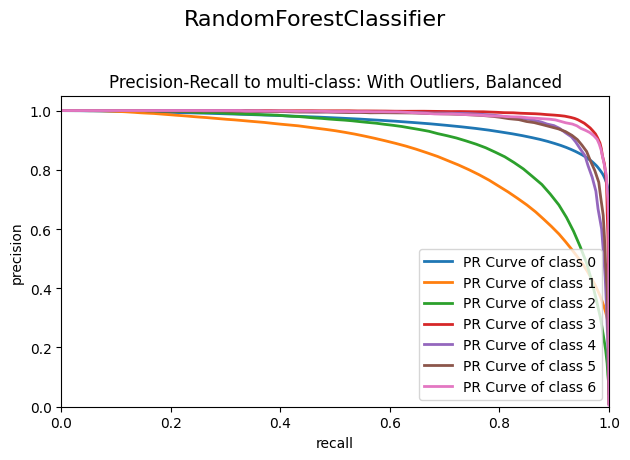

In [ ]:
rfc = RandomForestClassifier(random_state = 13)
rfc.fit(X_train_df1, np.ravel(y_train_df1))
y_pred = rfc.predict(X_test_df1)

plot_precision_recall_curve(df1_x.to_numpy(),
                            df1_y.to_numpy(),
                            rfc,
                            "With Outliers, Imbalanced")

plt.show()

## K Nearest Neighbors

In [32]:
knc = KNeighborsClassifier(n_neighbors = 3)

knc_acc = []
knc_precision = []
knc_recall = []
knc_f1 = []

print("Scores:")

for i in range(len(train_X)):
  model = knc.fit(train_X[i], np.ravel(train_y[i]))

  preds = model.predict(val_X[i])

  # basic accuracy
  acc = accuracy_score(val_y[i], preds)
  knc_acc.append(acc)

  # precision
  prec = precision_score(val_y[i], preds, average = "weighted")
  knc_precision.append(prec)

  # recall
  recall = recall_score(val_y[i], preds, average = "weighted")
  knc_recall.append(recall)

  # f1
  f1 = f1_score(val_y[i], preds, average = "weighted")
  knc_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outlier, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

Scores:
Accuracy With Outliers:  0.7307893518518519
Precision With Outliers:  0.7130620083797573
Recall With Outliers:  0.7307893518518519
F1 With Outliers:  0.7139248017419392

Accuracy Without Outliers:  0.7213454281904398
Precision Without Outliers:  0.6996183977358215
Recall Without Outliers:  0.7213454281904398
F1 Without Outliers:  0.7016637277687859

Accuracy With Outliers, Balanced:  0.911162635892143
Precision With Outliers, Balanced:  0.9074163080128591
Recall With Outliers, Balanced:  0.911162635892143
F1 With Outlier, Balanced:  0.9063821980749563

Accuracy Without Outliers, Balanced: 0.9081435014880579
Precision Without Outliers, Balanced: 0.9042445155179298
Recall Without Outliers, Balanced: 0.9081435014880579
F1 Without Outliers, Balanced:  0.9029791933730495


Moving Forward with df3, With Outliers, Balanced.

In [ ]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train_df3, y_train_df3)
y_pred = knc.predict(X_test_df3)

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            knc,
                            "With Outliers, Balanced")

plt.show()

## XGBoost Classifier

In [42]:
# encode y to be numerical for xgboost
le = LabelEncoder()

for i in range(len(train_y)):
  train_y[i] = le.fit_transform(np.ravel(train_y[i]))
  val_y[i] = le.transform(np.ravel(val_y[i]))

ValueError: invalid literal for int() with base 10: 'A'

In [34]:
xgb = XGBClassifier()

xgb_acc = []
xgb_precision = []
xgb_recall = []
xgb_f1 = []

print("Scores:")

for i in range(len(train_X)):
  model = xgb.fit(train_X[i], train_y[i])

  preds = model.predict(val_X[i])

  # basic accuracy
  acc = accuracy_score(val_y[i], preds)
  xgb_acc.append(acc)

  # precision
  prec = precision_score(val_y[i], preds, average = "micro")
    # micro calculates globally by counting the total true positives,
    # false negatives, and false positives
  xgb_precision.append(prec)

  # recall
  recall = recall_score(val_y[i], preds, average = "micro")
    # micro calculates globally by counting the total true positives,
    # false negatives, and false positives
  xgb_recall.append(recall)

  # f1
  f1 = f1_score(val_y[i], preds, average = "weighted")
  xgb_f1.append(f1)

  if i == 0:
    print("Accuracy With Outliers: ", acc)
    print("Precision With Outliers: ", prec)
    print("Recall With Outliers: ", recall)
    print("F1 With Outliers: ", f1)
  elif i == 1:
    print("\nAccuracy Without Outliers: ", acc)
    print("Precision Without Outliers: ", prec)
    print("Recall Without Outliers: ", recall)
    print("F1 Without Outliers: ", f1)
  elif i == 2:
    print("\nAccuracy With Outliers, Balanced: ", acc)
    print("Precision With Outliers, Balanced: ", prec)
    print("Recall With Outliers, Balanced: ", recall)
    print("F1 With Outlier, Balanced: ", f1)
  else:
    print("\nAccuracy Without Outliers, Balanced:", acc)
    print("Precision Without Outliers, Balanced:", prec)
    print("Recall Without Outliers, Balanced:", recall)
    print("F1 Without Outliers, Balanced: ", f1)

Scores:


ValueError: Mix of label input types (string and number)

In [43]:
# label encode y
le = LabelEncoder()
y_train_df3 = le.fit_transform(np.ravel(y_train_df3))


xgb = XGBClassifier()
xgb.fit(X_train_df3, y_train_df3)
y_pred = xgb.predict(X_test_df3)
y_proba = xgb.predict(X_test_df3)

plot_precision_recall_curve(df3_x.to_numpy(),
                            df3_y.to_numpy(),
                            xgb,
                            "Accuracy With Outliers, Balanced")

KeyboardInterrupt: 

# Hyperparameter Tuning

Moving forward with Random Forest Classifier and DF2, without outliers, unbalanced.

- n_estimators
  - number of trees in the forest
- max_depth
  - maximum depth of the tree
- max_features
  - number of faetures to consider
- bootstrap
  - whether bootstrap samples are used to build each tree

In [51]:
# use random search a couple times to narrow down
# then use grid search

rfc = RandomForestClassifier(random_state = 13)

param_grid = {"n_estimators": range(2, 7),
              "max_depth": range(2, 10),
              "max_features": [1, 2, 3, 4, 5, 6, 7, 8],
              "bootstrap": [True, False]}

n_estimators = []
max_depth = []
max_features = []
bootstrap = []

for i in range(50):
  ran_search = RandomizedSearchCV(rfc, param_grid,
                                  scoring = "f1_weighted")
  ran_search.fit(X_train_df1, np.ravel(y_train_df1))

  n_estimators.append(ran_search.best_params_["n_estimators"])
  max_depth.append(ran_search.best_params_["max_depth"])
  max_features.append(ran_search.best_params_["max_features"])
  bootstrap.append(ran_search.best_params_["bootstrap"])

n_estimators = set(n_estimators)
max_depth = set(max_depth)
max_features = set(max_features)
bootstrap = set(bootstrap)

n_estimators, max_depth, max_features, bootstrap

In [ ]:
# grid search

rfc = RandomForestClassifier(random_state = 13)

param_grid = {"n_estimators": list(n_estimators),
              "max_depth": list(max_depth),
              "max_features": list(max_features),
              "bootstrap": list(bootstrap)}

search = GridSearchCV(rfc, param_grid,
                      scoring = "f1_micro",
                      cv = 10)

search.fit(X_train_df1, np.ravel(y_train_df1))

best_estimator = search.best_estimator_
best_estimator

RandomForestClassifier(max_depth=9, max_features=7, n_estimators=2,
                       random_state=13)

In [ ]:
rfc = best_estimator

print("Scores:")

model = rfc.fit(X_train_df1, np.ravel(y_train_df1))

preds = model.predict(X_test_df1)

# basic accuracy
acc = accuracy_score(y_test_df1, preds)

# precision
prec = precision_score(y_test_df1, preds, average = "weighted")

# recall
recall = recall_score(y_test_df1, preds, average = "weighted")

# f1_score
f1 = f1_score(y_test_df1, preds, average = "weighted")

print("Accuracy With Outliers: ", acc)
print("Precision With Outliers: ", prec)
print("Recall With Outliers: ", recall)
print("F1 With Outliers: ", f1)

Scores:


/Users/lmhartmann/miniconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy With Outliers:  0.7041520295888206
Precision With Outliers:  0.7053914667899402
Recall With Outliers:  0.7041520295888206
F1 With Outliers:  0.6046195424171652


From: https://www.geeksforgeeks.org/ways-to-visualize-individual-decision-trees-in-a-random-forest/

In [ ]:
# Extract an individual decision tree from the Random Forest
individual_tree = rfc.estimators_[0]  # Get the first tree (you can choose any index)

# Export the decision tree as a DOT file
export_graphviz(individual_tree, out_file='individual_tree.dot',
                feature_names = list(X_test_df1.columns),
                class_names = list(y_test_df1.columns),
                rounded = True, filled = True)

# Convert the DOT file to a PNG image using Graphviz
(graph,) = pydot.graph_from_dot_file('individual_tree.dot')

# Write the PNG image
graph.write_png('individual_tree.png')